# Introductie

Dit notebook geeft een eerste opzet om aan de slag te kunnen met het project van Rijkswaterstaat.

Doel voor Rijkswaterstaat is inzicht krijgen in hun data, die ze momenteel alleen voor rapportages gebruiken. In het bijzonder is men geinteresseerd in de volgende drie onderwerpen:

  1) Verband tussen **Chemische stoffen** en **Chlorofyl A**. Chlorofyl A is de stof die in bladeren van planten en algen zit (https://en.wikipedia.org/wiki/Chlorophyll_a).  
  2) Verbanden binnen en tussen **stroomgebieden**.  
  3) Invloed van zwevend stof op overige concentraties.  
  
Als je liever iets anders uit wilt zoeken, is dit uiteraard toegestaan.  


# Data

De dataset is te vinden op: https://dataexchange.anchormen.nl:5001/sharing/bxr1c6k4q. Als het goed is, heeft iedereen toegang tot de map HPP Data Analyse Rijkswaterstaat. In die map staat een tweetal bestanden:
 - `waterkwaliteit_data.zip` met daarin:
   - `contact_martijn`: contactgegevens van de datascientist van RWS;
   - `data_tot.csv`: de dataset die we moeten analyseren, zie verderop dit notebook;
   - `knmi_data.txt`: data van het knmi, is al gekoppeld in `data_tot.csv`;
   - `RWSlocaties_OWMTYPE_definitief2015`: locaties die voorkomen in `data_tot.csv`, de kolom `SGB` bevat het stroomgebied dat hoort bij deze locatie.
 - `Beschrijving kolommen waterkwaliteit.xlsx`: per kolom van `data_tot.csv` een korte omschrijving van de inhoud.

Hieronder staan een aantal stappen die je wellicht op de goede weg helpen.

# Voorbeeldcode

### Inlezen data

Handige packages

In [1]:
import pandas as pd
import numpy as np
import os

pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [2]:
os.getcwd()

'C:\\Users\\Andre\\Documents\\ITvitae\\Studie\\Data Science (Anchormen)\\Module B\\Projectopdracht\\project-rws\\code'

Navigeer naar de goede locatie en laad de data over de waterkwaliteit in.  
Hier is `encoding="latin1"` nodig omdat er speciale karakters in de tekst voorkomen (in dit geval een 'â').  
Dit kan even duren, het bestand is 2GB groot.

In [4]:
df = pd.read_csv("../data/waterkwaliteit_data/data_tot.csv", encoding="latin1", index_col=0)

C:\Users\Andre\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:395: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [7]:
df.shape

(2345295, 118)

Het bestand heeft 2345295 regels en 118 kolommen.

In [8]:
df.head(200)

knmi_STN       DATUM       LOC   TIJD         PAR  BGC    WAARDE  KWC  \
1         NaN  2006-01-05  WALCRN70  '0813    s_NO3NO2  NaN    0.0890    0   
2         NaN  2006-01-05  WALCRN70  '0813         NO2  NaN    0.0080    0   
3         NaN  2006-01-05  WALCRN70  '0813         NH4    <    0.0020    0   
4         NaN  2006-01-05  WALCRN70  '0813         PO4  NaN    0.0260    0   
5         NaN  2006-01-05  WALCRN70  '0813        SiO2  NaN    0.1230    0   
6         NaN  2006-01-05  WALCRN70  '0813         NO3  NaN    0.0810    0   
7         NaN  2006-01-05  WALCRN70  '0813           P  NaN    0.0360   56   
8         NaN  2006-01-05  WALCRN70  '0813       CHLFa  NaN    0.9800    0   
9         NaN  2006-01-05  WALCRN70  '0813        FEOa  NaN    0.0400    0   
10        NaN  2006-01-05  WALCRN70  '0813         POC  NaN    0.1600    0   
11        NaN  2006-01-05  WALCRN70  '0813           N  NaN    0.0330    0   
12        NaN  2006-01-05  WALCRN70  '0813          ZS  NaN    6.3000    0   
13        NaN  2006-01-05  WALCRN70  '0813           N  NaN    0.4170    0   
14        NaN  2006-01-05  WALCRN70  '0813         DOC  NaN    0.8200    0   
15        NaN  2006-01-05  WALCRN70  '0813           P  NaN    0.0970   56   
16        NaN  2006-01-05  WALCRN70  '0813           N  NaN    0.4500    0   
17        NaN  2006-01-05  WALCRN70  '0813           P  NaN    0.1330   56   
18        NaN  2006-01-05  WALCRN70  '0813          pH  NaN    7.8720    0   
19        NaN  2006-01-05  WALCRN70  '0813           T  NaN    8.7800    0   
20        NaN  2006-01-05  WALCRN70  '0813      SALNTT  NaN   35.2600    0   
21        NaN  2006-01-05  WALCRN70  '0813     SENSHTE  NaN -377.0000    0   
22        NaN  2006-01-05  WALCRN70  '0813          O2  NaN    9.0900    0   
23        NaN  2006-01-05  WALCRN70  '0813         TOC  NaN    0.9800    0   
24        NaN  2006-01-10   TERSLG4  '0211         NO2  NaN    0.0310    0   
25        NaN  2006-01-10   TERSLG4  '0211         NH4  NaN    0.0610    0   
26        NaN  2006-01-10   TERSLG4  '0211         PO4  NaN    0.0240    0   
27        NaN  2006-01-10   TERSLG4  '0211        SiO2  NaN    0.2350    0   
28        NaN  2006-01-10   TERSLG4  '0211         NO3  NaN    0.1580    0   
29        NaN  2006-01-10   TERSLG4  '0211           P  NaN    0.0510    0   
30        NaN  2006-01-10   TERSLG4  '0211       CHLFa  NaN    2.6800    0   
31        NaN  2006-01-10   TERSLG4  '0211        FEOa  NaN    0.1800    0   
32        NaN  2006-01-10   TERSLG4  '0211         POC  NaN    1.3000    0   
33        NaN  2006-01-10   TERSLG4  '0211           N  NaN    0.1950    0   
34        NaN  2006-01-10   TERSLG4  '0211          ZS  NaN   37.8000    0   
35        NaN  2006-01-10   TERSLG4  '0211           N  NaN    0.3600    0   
36        NaN  2006-01-10   TERSLG4  '0211         DOC  NaN    1.0200    0   
37        NaN  2006-01-10   TERSLG4  '0211           P  NaN    0.0910    0   
38        NaN  2006-01-10   TERSLG4  '0211           N  NaN    0.5550    0   
39        NaN  2006-01-10   TERSLG4  '0211           P  NaN    0.1420    0   
40        NaN  2006-01-10   TERSLG4  '0211          pH  NaN    7.7890    0   
41        NaN  2006-01-10   TERSLG4  '0211           T  NaN    4.5290    0   
42        NaN  2006-01-10   TERSLG4  '0211      SALNTT  NaN   32.5700    0   
43        NaN  2006-01-10   TERSLG4  '0211     SENSHTE  NaN -360.0000    0   
44        NaN  2006-01-10   TERSLG4  '0211          O2  NaN   10.0300    0   
45        NaN  2006-01-10   TERSLG4  '0211    s_NO3NO2  NaN    0.1880    0   
46        NaN  2006-01-10   TERSLG4  '0211         TOC  NaN    2.3200    0   
47        NaN  2006-01-24   TERSLG4  '0622         NO2  NaN    0.0350    0   
48        NaN  2006-01-24   TERSLG4  '0622         NH4  NaN    0.0410    0   
49        NaN  2006-01-24   TERSLG4  '0622         PO4  NaN    0.0230    0   
50        NaN  2006-01-24   TERSLG4  '0622        SiO2  NaN    0.2580    0   
51        NaN  2006-01-24  

#### Kolommen

In [11]:
print(list(df.columns))

['knmi_STN', 'DATUM', 'LOC', 'TIJD', 'PAR', 'BGC', 'WAARDE', 'KWC', 'EHD', 'DOM', 'WNS', 'HDH', 'ANA', 'CPM', 'BEM', 'BEW', 'PLT:REFVLAK', 'PLT:BMH', 'SGK', 'ORG', 'IVS', 'BTX', 'BTN', 'GBD', 'LOC:TYPE', 'LOC:COORDSRT', 'LOC:X', 'LOC:Y', 'PLT:X', 'PLT:Y', 'OGI', 'ANI', 'BHI', 'BMI', 'VAT', 'SYS', 'TYP', 'TYD:BEGINDAT', 'TYD:BEGINTYD', 'TYD:EINDDAT', 'TYD:EINDTYD', 'STA:BEGINDAT', 'STA:BEGINTYD', 'STA:EINDDAT', 'STA:EINDTYD', 'STA:RKSSTATUS', 'EXTCODE', 'BRON', 'LOCOMS', 'DATUMTIJDWAARDE', 'PAROMS', 'EHDOMS', 'WNSOMS', 'HDHOMS', 'ANAOMS', 'CPMOMS', 'BEMOMS', 'BEWOMS', 'SGKOMS', 'ORGOMS', 'IVSOMS', 'BTXCOD', 'BTXOMS', 'BTNOMS', 'GBDOMS', 'OGIOMS', 'ANIOMS', 'BHIOMS', 'BMIOMS', 'VATOMS', 'SYSOMS', 'TYPOMS', 'is_PAK', 'ID', 'X_RD', 'Y_RD', 'X_WGS', 'Y_WGS', 'YYYYMMDD', 'DDVEC', 'FHVEC', 'FG', 'FHX', 'FHXH', 'FHN', 'FHNH', 'FXX', 'FXXH', 'TG', 'TN', 'TNH', 'TX', 'TXH', 'T10N', 'T10NH', 'SQ', 'SP', 'Q', 'DR', 'RH', 'RHX', 'RHXH', 'EV24', 'PG', 'PX', 'PXH', 'PN', 'PNH', 'VVN', 'VVNH', 'VVX', 

Dit zijn de kolomnamen. Erg veel kolommen zijn nutteloos (zie `Beschrijving kolommen waterkwaliteit.xlsx`) of altijd leeg. Een goede eerste stap is om die kolommen weg te gooien, dat scheelt een boel geheugen en maakt alles overzichtelijker. Over het algemeen bevatten kolommen met 'OMS' in de naam een omschrijving van de kolom waarnaar ze verwijzen.  
Interessante kolommen: ParameterOmschrijving, HoedanigheidsOmschrijving, AnalyseOmschrijving

In [6]:
df[["PAROMS", "HDHOMS", "ANAOMS"]].head()

PAROMS                                 HDHOMS  \
1  Som nitraat en nitriet  Uitgedrukt in Stikstof / Na filtratie   
2                 nitriet  Uitgedrukt in Stikstof / Na filtratie   
3                ammonium  Uitgedrukt in Stikstof / Na filtratie   
4            orthofosfaat    Uitgedrukt in Fosfor / Na filtratie   
5                silicaat  Uitgedrukt in Silicium / Na filtratie   

                        ANAOMS  
1  Nutrienten mbv autoanalyser  
2  Nutrienten mbv autoanalyser  
3  Nutrienten mbv autoanalyser  
4  Nutrienten mbv autoanalyser  
5  Nutrienten mbv autoanalyser

### Verkennen mogelijk interessante kolommen

In [119]:
parameter = df['PAR'].unique()
len(parameter)

532

In [120]:
print(np.sort(parameter))

['%AC' '%C' '%DS' '%GR' '%GV' '%KGF10' '%KGF16' '%KGF2' '%KGF20' '%KGF32'
 '%KGF4' '%KGF50' '%KGF63' '%KGF8' '%KGFG63' '%O2' '%OC' '111TClC2a'
 '1122T4ClC2a' '112TClC2a' '11DClC2a' '11DClC2e' '1234T4ClBen'
 '1235T4ClBen' '123TC1yBen' '123TClBen' '123TClC3a' '1245T4ClBen'
 '124TC1yBen' '124TClBen' '12DClBen' '12DClC2a' '12DClC2e' '12DClC3a'
 '12xyln' '135TC1yBen' '135TClBen' '13DCl2C3ol' '13DClBen' '13DClC3a'
 '14DClBen' '1C3yBen' '1Cl2NO2Ben' '1Cl3NO2Ben' '1ClNaf' '2255T4C4yT4H'
 '2345T4ClFol' '2346T4ClFol' '234TClFol' '2356T4ClFol' '235TClFol'
 '236TClFol' '23DClFol' '23DClNO2Ben' '245T' '245TClFol' '245TP'
 '246TClFol' '24D' '24DB' '24DClNO2Ben' '24DDD' '24DDE' '24DDT' '24DNO2Fol'
 '24DP' '25DClNO2Ben' '26DClFol' '2C2ox2C1yC3a' '2C2yTol' '2ClAn' '2ClC2ol'
 '2ClFol' '2ClTol' '345TClFol' '34DClFol' '34DClNO2Ben' '35DClFol'
 '3C2yTol' '3Cl4C1yAn' '3ClAn' '3ClC3e' '3ClFol' '3ClTol' '44DDD' '44DDE'
 '44DDT' '4C2yTol' '4C9yFol' '4Cl3C1yFol' '4Cl3NO2Tol' '4ClAn' '4ClFol'
 '4ttC8yFol' '5Cl2N

In [121]:
parameter_omschrijving = df['PAROMS'].unique()
len(parameter_omschrijving)

532

In [122]:
print(np.sort(parameter_omschrijving))

['1,1,1-trichloorethaan' '1,1,2,2-tetrachloorethaan'
 '1,1,2-trichloorethaan' '1,1-dichloorethaan' '1,1-dichlooretheen'
 '1,2,3,4,6,7,8,9-octachloordibenzo-p-dioxine'
 '1,2,3,4,6,7,8,9-octachloordibenzofuraan'
 '1,2,3,4,6,7,8-heptachloordibenzo-p-dioxine'
 '1,2,3,4,6,7,8-heptachloordibenzofuraan'
 '1,2,3,4,7,8,9-heptachloordibenzofuraan'
 '1,2,3,4,7,8-hexachloordibenzo-p-dioxine' '1,2,3,4-tetrachloorbenzeen'
 '1,2,3,5-tetrachloorbenzeen' '1,2,3,6,7,8-hexachloordibenzo-p-dioxine'
 '1,2,3,6,7,8-hexachloordibenzofuraan'
 '1,2,3,7,8,9-hexachloordibenzo-p-dioxine'
 '1,2,3,7,8,9-hexachloordibenzofuraan'
 '1,2,3,7,8-pentachloordibenzo-p-dioxine' '1,2,3-trichloorbenzeen'
 '1,2,3-trichloorpropaan' '1,2,3-trimethylbenzeen'
 '1,2,4,5-tetrachloorbenzeen' '1,2,4-trichloorbenzeen'
 '1,2,4-trimethylbenzeen' '1,2-dichloorbenzeen' '1,2-dichloorethaan'
 '1,2-dichlooretheen' '1,2-dichloorpropaan' '1,2-xyleen'
 '1,3,5-trichloorbenzeen' '1,3,5-trimethylbenzeen'
 '1,3-dichloor-2-propanol' '1,3-dichloorbenze

In [127]:
hoedanigheid = df['HDH'].unique()
print(np.sort(Hoedanigheid))

['20oC' 'CaCO3' 'Cl' 'Clnf' 'N' 'NVT' 'Ndg' 'Nnf' 'Pnf' 'Sinf' 'Sipg' 'Sn'
 'Sndg' 'WARNDN' 'WATSGL' 'dg' 'nf' 'pg']


In [128]:
hoedanigheid_omschrijving = df['HDHOMS'].unique()
len(hoedanigheid_omschrijving)

18

In [129]:
print(np.sort(hoedanigheids_omschrijving))

['Drooggewicht' 'Na filtratie' 'Niet van toepassing' 'Particulair gebonden'
 'T.o.v. 20 graden Celsius' 'T.o.v. Waterspiegel' 'T.o.v. ware Noorden'
 'Uitgedrukt in Calciumcarbonaat (CaCO3)' 'Uitgedrukt in Chloride'
 'Uitgedrukt in Chloride / Na filtratie'
 'Uitgedrukt in Fosfor / Na filtratie'
 'Uitgedrukt in Silicium / Na filtratie'
 'Uitgedrukt in Silicium, particulair gebonden' 'Uitgedrukt in Stikstof'
 'Uitgedrukt in Stikstof / Drooggewicht'
 'Uitgedrukt in Stikstof / Na filtratie' 'Uitgedrukt in Tin'
 'Uitgedrukt in Tin / Drooggewicht']


In [138]:
analyse_methode = df['ANA'].unique()
print(np.sort(analyse_methode))

['A007' 'A008' 'A034' 'A049' 'A056' 'A067' 'A074' 'A075' 'A081' 'A082'
 'A083' 'A088' 'A089' 'A090' 'A092' 'A100' 'A200' 'A3051' 'A3060' 'A404'
 'A418' 'A420' 'A421' 'A423' 'A4404' 'A4411' 'A5320' 'A647' 'A649' 'A651'
 'A653' 'F004' 'F105' 'FMW001' 'FMW002' 'FW005' 'FW006' 'FW007' 'FW008'
 'FW009' 'FW010' 'FW012' 'FW015' 'I10304_1' 'I11369' 'I11905_2' 'I14403'
 'I15681_2' 'I16588' 'I16772' 'I17294_2' 'I17852' 'I21458' 'I6340' 'I6468'
 'I7899_2' 'I9308_1' 'I9562' 'I9963' 'LOA505' 'MTC3S005' 'N12673' 'N1484'
 'N15204' 'N1899_1' 'N5622' 'N5623' 'N5627' 'N5756' 'N5779' 'N6274' 'N6402'
 'N6407' 'N6420' 'N6421' 'N6426' 'N6442' 'N6445' 'N6484' 'N6520' 'N6526'
 'N6527' 'N6531' 'N6570' 'N6571' 'N6604' 'N6633' 'N6646' 'N6655' 'N6663'
 'N6670' 'N6674' 'N6950' 'N6966' 'NVT' 'OMS15GW' 'OM_LC25W' 'ONB' 'R6522'
 'V5622' 'V5623' 'V5627' 'V5637' 'W1086' 'W1445' 'W3041' 'W3050' 'W4330'
 'W4405' 'W5310' 'W5316' 'W5327' 'W5352' 'W5410' 'W5411' 'W5413' 'W5414'
 'W5418' 'W5423' 'W5424' 'W5429' 'W6016' 'W700

In [131]:
analyse_omschrijving = df['ANAOMS'].unique()
len(analyse_omschrijving)

167

In [132]:
print(np.sort(analyse_omschrijving))

['913.00.W015, Bepaling fysisch-chemische veldparameters'
 'AES bepaling mbv vlamtechniek' 'AES bepaling van 40 elementen mbv ICP'
 'An. PFOS en PFOA mbv solid phase extractie en LC-MS/MS detec'
 'Bep F,Cl,NO2,oPO4,Br,NO3,SO4 mbv LC NEN-EN-ISO'
 'Bep Tc99 met behulp van vloeistofscintillatie teltecniek'
 'Bep bicarbonaat mbv potentiometrische titr obv N6532 (HWL)'
 'Bep geselecteerde elementen in bodem, waterbodem en slib'
 'Bep massieke tot beta + rest-beta-activiteit vast telmonster'
 'Bep v metalen mbv ICP/MS gelijkwaardig aan I17294-1/2 (HWL)'
 'Bep v organ+totaal koolst gehalte in grond na drogeverassing'
 'Bep van CHLFa mbv spectrofotometerie gelijkw. N6520 (HWL)'
 'Bep van Ecoli en coligroep bacterien gelijkw. I9308-1 (HWL)'
 'Bep van anion actieve detergentiea (MBAS) obv N903 (HWL)'
 'Bep van opgeloste anionen mbv LC gelijkw. I10304-1 (HWL)'
 'Bep van polaire bestrijdingsmiddelen met LCMSMS in water'
 'Bep van polaire bestrijdingsmiddelen stoffen met LC/MS/MS'
 'Bep van totaal 

In [66]:
KNMI_station = df['knmi_STN'].unique()
print(np.sort(KNMI_station))

[ 210.  225.  235.  240.  242.  249.  251.  257.  258.  260.  265.  267.
  269.  270.  273.  275.  277.  278.  280.  283.  286.  290.  310.  319.
  323.  330.  340.  344.  348.  350.  356.  377.  380.  391.   nan]


In [24]:
datum = df['DATUM'].unique()

In [25]:
len(datum)

2425

In [135]:
print(np.sort(datum))

['2006-01-02' '2006-01-03' '2006-01-04' ..., '2016-12-27' '2016-12-28'
 '2016-12-29']


In [31]:
locatie = df['LOC'].unique()

In [32]:
len(locatie)

115

In [56]:
print(np.sort(locatie))

['ALMLO' 'AMRKHVN2' 'AMSDM' 'ANDK' 'BEERKNMDN' 'BELFBVN' 'BLAUWSOT'
 'BOCHTVWTM' 'BOCHTVWTND' 'BOOMKDP' 'BOVSS' 'BRAKL' 'BRIENOD' 'BROEKHVN'
 'BUITHVN8' 'DANTZGT' 'DOMBBSD' 'DOOVBOT' 'DOOVBWT' 'DREISR' 'DRONTMDK0.4'
 'EEFDBVN' 'EEMMDK23' 'EIJSDPTN' 'ENSDVTS' 'GENMDN' 'GOERE2' 'GOERE6'
 'GOOIMMDN' 'GOUDVHVN' 'GROOTGND' 'HAGSN' 'HAMMOT' 'HANSWGL' 'HARLGVHVN'
 'HARVSS' 'HASST' 'HEEL' 'HERKGN' 'HEUSDBSVR' 'HOEDKKKBI4' 'HOLLDMDSKWT'
 'HOORNSHP' 'HOUTRHK' 'HUIBGOT' 'IJMDN1' 'KAMPN' 'KEIZVR' 'KETMWT'
 'LAUWOHVMD' 'LELSHVN' 'LOBPTN' 'LODSGT' 'MAASSS' 'MARKGZE' 'MARKMMDN'
 'MARSDND' 'NEDWT' 'NIEUWGN' 'NIEUWSS' 'NOORDWK10' 'NOORDWK2' 'NOORDWK20'
 'NOORDWK70' 'NULDHK' 'OESTDM' 'OUDDBSD' 'PAMPOT' 'PUTTHK' 'RAMSDP' 'REVE'
 'ROGGPGWT' 'ROTTMPT3' 'ROTTMPT50' 'ROTTMPT70' 'SASVGT' 'SCHAARVODDL'
 'SCHARDKDPPT' 'SCHEELHK' 'SCHOUWN10' 'SOELKKPDOT' 'STEENBGN' 'STEILBK'
 'STEVWT' 'TERNZBI20' 'TERSLG10' 'TERSLG100' 'TERSLG135' 'TERSLG175'
 'TERSLG235' 'TERSLG4' 'TERSLG50' 'VELWMMDN' 'VLIESM' 'VLISSGBISSVH'
 

In [137]:
locatie_omschrijving = df['LOCOMS'].unique()
print(np.sort(locatie_omschrijving))

['Almelo' 'Amerikahaven-2' 'Amsterdam (kilometer 25, IJtunnel)' 'Andijk'
 'Beerkanaal midden' 'Belfeld boven' 'Blauwe Slenk oost' 'Bocht van Watum'
 'Bocht van Watum noord' 'Boomkensdiep' 'Bovensluis'
 'Brakel (Andelse Maas)' 'Brienenoord (kilometer 996.5)' 'Broekerhaven'
 'Buitenhaven 8' 'Dantziggat' 'De Zwaan' 'Domburg badstrand'
 'Doove Balg oost' 'Doove Balg west' 'Dreischor'
 'Drontermeerdijk, kilometer 0.4' 'Eefde boven' 'Eemmeerdijk, kilometer 23'
 'Eijsden ponton' 'Enschede Vitens' 'Genemuiden' 'Goeree 2 km uit de kust'
 'Goeree 6 km uit de kust' 'Gooimeer midden' 'Gouda voorhaven'
 'Groote Gat noord' 'Hagestein' 'Hammen oost' 'Hansweert geul'
 'Haringvlietsluis' 'Harlingen voorhaven' 'Hasselt' 'Herkingen'
 'Heusden Bernse Veer' 'Hoedekenskerke boei 4'
 'Hollandsch Diep (mond Dordtsche Kil west)' 'Hoornsche Hop' 'Houtribhoek'
 'Huibertgat oost' 'IJmuiden (kilometer 2)'
 'Innamewerk Water Productiebedrijf Heel' 'Kampen' 'Keizersveer'
 'Ketelmeer west' 'Lauwersoog havenmond' 'Lel

In [28]:
tijd = df['TIJD'].unique()

In [29]:
len(tijd)

1225

In [136]:
print(np.sort(tijd))

["'0000" "'0001" "'0004" ..., "'2354" "'2356" "'2359"]


In [59]:
Rapportage_grens = df['BGC'].unique()
Rapportage_grens

array([nan, '<', '>'], dtype=object)

In [60]:
Meetwaarde = df['WAARDE'].unique()
print(list(np.sort(Meetwaarde)))

[-2570.0, -1830.0, -1000.0, -999.0, -411.0, -408.0, -405.0, -404.0, -403.0, -401.0, -400.0, -399.0, -397.0, -396.0, -395.0, -392.0, -391.0, -388.0, -386.0, -385.0, -384.0, -383.0, -382.0, -381.0, -380.0, -379.0, -378.0, -377.0, -376.0, -375.0, -374.0, -373.0, -372.0, -371.0, -370.0, -369.0, -368.0, -366.0, -364.0, -363.0, -362.0, -361.0, -360.0, -359.0, -358.0, -357.0, -356.0, -355.0, -354.0, -353.0, -352.0, -351.0, -350.0, -349.0, -348.0, -346.0, -345.0, -344.0, -343.0, -342.0, -341.0, -340.0, -339.0, -338.0, -337.0, -336.0, -335.0, -334.0, -333.0, -331.0, -330.0, -329.0, -328.0, -327.0, -326.0, -324.0, -323.0, -322.0, -321.0, -320.0, -319.0, -318.0, -317.0, -316.0, -315.0, -314.0, -310.0, -307.0, -304.0, -303.0, -300.0, -299.0, -298.0, -293.0, -290.0, -289.0, -288.0, -283.0, -280.0, -278.0, -274.0, -264.0, -263.0, -252.0, -248.0, -238.0, -237.0, -233.0, -224.0, -207.0, -185.0, -174.0, -170.0, -168.0, -163.0, -162.0, -161.0, -160.0, -159.0, -158.0, -157.0, -156.0, -155.0, -154.0, -153

In [67]:
Kwaliteits_keurmerk = df['KWC'].unique()
print(np.sort(Kwaliteits_keurmerk))

[ 0  1  2  3  4  6  7 50 53 56 57 60]


In [68]:
Eenheid = df['EHD'].unique()
print(np.sort(Eenheid))

['%' '/l' '/m' 'Bq/kg' 'DIMSLS' 'PtCo' 'cm' 'dm' 'g' 'g/kg' 'graad' 'h'
 'hPa' 'l' 'm/s' 'mBq/l' 'mS/m' 'mg/g' 'mg/kg' 'mg/l' 'ng/kg' 'ng/l' 'oC'
 'ug/kg' 'ug/l']


In [96]:
Eenheid_omschrijving = df['EHDOMS'].unique()
print(np.sort(Eenheid_omschrijving))

[ nan]


In [75]:
Compartiments_code = df['CPM'].unique()
print(np.sort(Compartiments_code))

[10 50 80]


In [99]:
Compartiment_omschrijving = df['CPMOMS'].unique()
print(np.sort(Compartiment_omschrijving))

['Lucht' 'Oppervlaktewater' 'Zwevende stof']


In [76]:
Bemonsterings_methode = df['BEM'].unique()
print(np.sort(Bemonsterings_methode))

['S' 'SW001' 'SW002' 'VELDMTG' 'VELDMTIS' 'VTIJD' 'VW005']


In [100]:
Bemonsterings_methode_omschrijving = df['BEMOMS'].unique()
print(np.sort(Bemonstering_omschrijving))

['Monstername oppervlaktewater - emmer'
 'Monstername oppervlaktewater - pomp'
 'Monstername zwevende stof - doorstroomcentrifuge' 'Steekmonster'
 'Veldmeting, directe bepaling in het veld'
 'Veldmeting, directe bepaling in situ' 'Verzamelmonster tijdproportioneel']


In [77]:
Bewerkings_methode = df['BEW'].unique()
print(np.sort(Bewerkings_methode))

['NVT']


In [101]:
Bewerkings_methode_omschrijving = df['BEWOMS'].unique()
print(np.sort(Bewerkings_methode_omschrijving))

['Niet van toepassing']


In [80]:
Referentie_vlak = df['PLT:REFVLAK'].unique()
print(np.sort(Referentie_vlak))

['WATSGL']


In [81]:
Bemonterings_hoogte = df['PLT:BMH'].unique()
print(np.sort(Bemonterings_hoogte))

[-100]


In [82]:
Biotaxonomie = df['BTX'].unique()
print(np.sort(Biotaxonomie))

['5611113000' '5614601000' '5614603000' '5614717000' '6413202010'
 '6413700000' '9999910000' '9999910100' '9999910200' '9999910300' 'NVT']


In [104]:
Biotaxonomie_omschrijving = df['BTXOMS'].unique()
print(np.sort(Biotaxonomie_omschrijving))

['Anabaena' 'Aphanizomenon' 'Coli bacterie' 'Enterococcacea'
 'Escherichia coli' 'Microcystis' 'Niet van toepassing' 'Planktothrix'
 'Salmonella bacterie' 'Streptococcus faecalis groep D'
 'Thermo tolerante coli bacterie']


In [103]:
Biotaxonomie_code= df['BTXCOD'].unique()
print(np.sort(Biotaxonomie_omschrijving))

['ANNASPEC' 'APNISPEC' 'COLIBACT' 'ENCOCCAE' 'ESCHCOLI' 'MICYSPEC' 'NVT'
 'PLANSPEC' 'SALMONEL' 'STREFAEC' 'THTOCOLI']


In [84]:
BTN = df['BTN'].unique()
print(np.sort(BTN))

['-' 'Bacterie' 'Intestinale-entero coccen' 'Niet van toepassing'
 'bacterie' 'coli bacterie']


In [105]:
BTN_omschrijving = df['BTNOMS'].unique()
print(np.sort(BTN_omschrijving))

[ nan]


In [85]:
Gebieds_code = df['GBD'].unique()
print(np.sort(Gebieds_code))

['AMSDRKNL' 'BERGSMS' 'BREEVTN' 'CALKNL' 'DOGGBK' 'DRONTMR' 'EEMMR'
 'EEMSDLD' 'FRIESFT' 'GERMBT' 'GOOIMR' 'GREVLGMR' 'HARVT' 'HOLLDP'
 'HOLLSIJSL' 'HOLLSKT' 'IJMR' 'IJSSL' 'IJSSMR' 'KANVGNTNZN' 'KETMR'
 'LATKNLNBGNM' 'LEK' 'LEKKNL' 'MAAS' 'MARKMR' 'NIEUWMS' 'NIEUWWTWG'
 'NOORDZKNL' 'NULDNW' 'OESTGDN' 'OOSTSDE' 'OUDMS' 'RIJN' 'SCHELDE' 'TERSLG'
 'TWENTKNL' 'VEERSMR' 'VELWMR' 'VOLKRZMR' 'VOORDTA' 'VOSSMR' 'WAAL'
 'WADDKT' 'WADDZOT' 'WADDZWT' 'WESTSDE' 'WOLDWD' 'ZUIDWLVT' 'ZWARTMR'
 'ZWARTWTR']


In [106]:
Gebieds_code_omschrijving = df['GBDOMS'].unique()
print(np.sort(Gebieds_code_omschrijving))

['Amsterdam-Rijnkanaal' 'Bergsche Maas'
 'Breeveertien  (Zuidelijke Noordzee, NCP)' 'Calandkanaal'
 'Doggersbank  (Centrale Noordzee, NCP)' 'Drontermeer  (randmeer)'
 'Eemmeer  (randmeer)' 'Eems-Dollard'
 'Friese Front  (Centrale Noordzee, NCP)' 'German Bight  (zeegebied)'
 'Gooimeer  (randmeer)' 'Grevelingenmeer' 'Haringvliet'
 'Hollandsche IJssel' 'Hollandse Diep' 'Hollandse kust  (Kustzone, NCP)'
 'IJmeer' 'IJssel' 'IJsselmeer' 'Kanaal van Gent naar Terneuzen'
 'Ketelmeer' 'Lateraal Kanaal Linne Buggenum' 'Lek' 'Lekkanaal' 'Maas'
 'Markermeer' 'Nieuwe Maas' 'Nieuwe Waterweg' 'Noordzeekanaal'
 'Nuldernauw  (randmeer)' 'Oestergronden  (Centrale Noordzee, NCP)'
 'Oosterschelde' 'Oude Maas' 'Rijn / Bovenrijn' 'Schelde (Belgie)'
 'Terschelling  (kustvak)' 'Twente kanaal' 'Veerse meer'
 'Veluwemeer  (randmeer)' 'Volkerak / Zoommeer'
 'Voordelta  (Kustzone, NCP)' 'Vossemeer  (randmeer)' 'Waal'
 'Waddenkust  (Kustzone, NCP)' 'Waddenzee oost' 'Waddenzee west'
 'Westerschelde' 'Wolderwijd  (r

In [140]:
Locatie_type = df['LOC:TYPE'].unique()
print(np.sort(Locatie_type))

['P']


In [112]:
Locatie_coordinaten_soort = df['LOC:COORDSRT'].unique()
print(np.sort(Locatie_coordinaten_soort))

['E50' 'RD']


In [143]:
Location_X = df['LOC:X'].unique()
print(np.sort(Location_X))

[ 1385300  2226100  2404500  2828000  3092700  3131400  3243900  3294300
  3315300  3413000  3522500  3550048  3954000  4010000  4022800  4103000
  4180900  4203100  4242000  4242200  4425000  4460100  4620000  4871000
  4883000  5060300  5090200  5100672  5142000  5300000  5430000  5909000
  5953000  6125100  6183600  6335100  6340000  6487500  6525000  6565000
  6570000  6590000  6753200  7440000  7575000  7582500  7675000  9320000
  9570000  9837000 10020600 10102500 10300000 10720000 11176200 11220000
 11263000 11333000 11398400 11636900 12095000 12221600 12850000 12944000
 13120000 13300000 13450000 13459800 13550000 13618000 13752000 13952900
 13985000 14200000 14201900 14626500 14675000 14770000 14830000 15281000
 15425000 15540000 15625000 16080000 16285800 16730900 17133300 17226000
 17478000 17700000 17760000 18030000 18523700 18681200 18681400 18713300
 19099000 19186500 19275000 19910000 20095000 20242000 20350000 20455000
 20562000 20905000 21319708 22982900 23899000 23942

In [144]:
Location_Y = df['LOC:Y'].unique()
print(np.sort(Location_Y))

[31000000 34916600 35549000 35908000 36485000 37018000 37407000 37420000
 38190000 38204900 38280000 38390000 38785000 38878000 39256400 39611000
 39817000 40273000 40560000 40644000 40700000 40756000 40905000 41190000
 41210000 41395300 41472000 41490000 41726300 41825400 42510000 42563500
 42601000 42650000 42760000 42785000 42975000 43495000 43717000 44380000
 44475000 44560000 44830000 46392576 46830000 47308900 47320000 47548500
 47675000 48167600 48467200 48609500 48655300 48821000 49035200 49081500
 49175000 49351300 49351800 49414900 49600000 49700000 49786000 49814300
 50200000 50345900 50605200 50806000 50810000 50865900 51158000 51325600
 51368000 51393100 51400000 51431200 51504880 51521100 51572500 51595000
 51597800 52154100 52180800 52203000 52215400 52351000 52925000 53224692
 53245500 53274000 53335800 53460300 53571400 53590000 53790300 54070500
 54085800 54245600 54430900 55102000 55525000 56295000 56640000 57640000
 58200000 59190000 59231800 59540000 60170000 60300

In [141]:
PLT_X = df['PLT:X'].unique()
print(np.sort(PLT_X))

[ 1385300  1403900  1417700  2226100  2404500  2828000  2830300  3092700
  3131400  3243900  3294300  3295300  3315300  3413000  3522500  3550000
  3550048  3943800  3954000  4010000  4013000  4022800  4103000  4180900
  4203100  4242000  4242200  4265000  4425000  4429000  4460100  4605200
  4620000  4871000  4880100  4883000  4890300  5060300  5090200  5095400
  5100672  5101000  5142000  5142500  5300000  5430000  5909000  5953000
  5972900  6125100  6183600  6335100  6340000  6487500  6525000  6565000
  6565400  6570000  6570700  6590000  6753200  6783000  6789700  7440000
  7571200  7575000  7585699  7586000  7589600  7770000  7770900  9320000
  9570000  9837000 10020600 10102500 10300000 10708400 10711900 10720000
 10725326 10729100 10730700 11176200 11220000 11263000 11333000 11398400
 11399400 11636900 12095000 12219100 12221600 12221700 12247200 12850000
 12973200 12973700 13120000 13195000 13300000 13450000 13459800 13550000
 13618000 13777400 13778400 13952900 13985000 14201

In [142]:
PLT_Y = df['PLT:Y'].unique()
print(np.sort(PLT_Y))

[31000000 34928000 35549000 35908000 35967400 36490000 37018000 37378800
 37384699 37389000 37395000 37420000 37450000 38183000 38190000 38204900
 38249200 38280000 38296200 38390000 38397400 38785000 38878000 38892900
 39023000 39256400 39599600 39611000 39817000 40273000 40279100 40560000
 40560200 40644000 40700000 40700500 40756000 40763500 40905000 40905500
 41190000 41210000 41395300 41472000 41490000 41726300 41825400 41828800
 42288000 42510000 42563500 42599600 42601300 42650000 42760000 42785000
 42975000 43495000 43570200 43572000 44380000 44477900 44478000 44554600
 44554700 44560000 44571840 44574300 44577100 44830000 46392600 46830000
 47282600 47285500 47286200 47294500 47308900 47548500 47675000 48167600
 48453700 48602000 48605900 48655300 48692300 48821000 48823100 48824600
 48830600 49035200 49081500 49175000 49351300 49351800 49356700 49414900
 49700000 49786000 49814300 50200000 50266200 50345900 50435000 50605200
 50747000 50749000 50810000 50866000 50880000 51325

In [91]:
Invoer_definitief_of_niet = df['STA:RKSSTATUS'].unique()
print(np.sort(Invoer_definitief_of_niet))

['D' 'G' 'O']


In [139]:
Datum_tijd = df['DATUMTIJDWAARDE'].unique()
print(np.sort(Datum_tijd))

['1-10-2007 10:35:00' '1-10-2007 11:00:00' '1-10-2007 12:33:00' ...,
 '9-9-2015 9:44:00' '9-9-2016 6:48:00' '9-9-2016 7:37:00']


In [107]:
Pak_of_niet = df['is_PAK'].unique()
print(np.sort(Pak_of_niet))

[0 1]


In [110]:
ID = df['ID'].unique()
print(np.sort(ID))

[      1       2       3 ..., 2345293 2345294 2345295]


In [113]:
X_RD = df['X_RD'].unique()
print(np.sort(X_RD))

[ -31122.    5084.   12845.   13853.   17913.   24263.   28280.   30127.
   39540.   40100.   42420.   44250.   45687.   46200.   48710.   48830.
   50745.   51420.   53000.   53594.   59090.   59530.   63400.   64875.
   65250.   65650.   65700.   65900.   67532.   67571.   72374.   74400.
   75750.   75825.   76750.   80995.   86669.   88000.   93200.   95700.
   98370.  100206.  103000.  107200.  111762.  112200.  112630.  113330.
  113984.  114072.  116369.  120950.  122216.  128500.  129440.  131200.
  131950.  133000.  134500.  134598.  135952.  136180.  137520.  139850.
  140360.  142000.  142019.  146265.  146750.  147700.  148300.  152810.
  154250.  155400.  156250.  160800.  162858.  167309.  171333.  172260.
  174780.  177000.  177600.  180300.  185237.  186812.  187133.  190990.
  191865.  192750.  199100.  200950.  202420.  203500.  204550.  205620.
  209050.  213197.  215552.  229829.  232944.  238990.  239425.  241300.
  253789.  255230.  258700.  272952.      nan]


In [114]:
Y_RD = df['Y_RD'].unique()
print(np.sort(Y_RD))

[ 310000.  349166.  355490.  359080.  364850.  370180.  374070.  374200.
  381900.  382049.  382800.  383900.  387850.  388780.  392564.  396110.
  397305.  402730.  405600.  406440.  407000.  407560.  409050.  409883.
  411900.  412100.  414720.  414900.  416180.  418254.  422880.  425100.
  425635.  426010.  427600.  429638.  429750.  432221.  434950.  437170.
  443800.  444308.  444750.  445600.  448300.  463926.  468300.  473089.
  473200.  475160.  475485.  476750.  479803.  481676.  484329.  484672.
  486095.  486553.  488210.  490352.  490815.  491750.  493513.  493518.
  494149.  496000.  497000.  497860.  498143.  502000.  503459.  508060.
  508100.  508659.  510322.  511580.  513680.  514000.  515950.  515978.
  522154.  529250.  535900.  537903.  555250.  562950.  566400.  576400.
  582000.  591900.  592318.  595400.  599200.  601700.  603000.  603080.
  605050.  607576.  608232.  610100.  619980.  620518.  642470.  663429.
  681625.  685306.  715256.  749537.  800921.      

In [115]:
X_WGS = df['X_WGS'].unique()
print(np.sort(X_WGS))

[ 3.157422  3.220431  3.358291  3.410673  3.49511   3.545362  3.565619
  3.6915    3.720566  3.730818  3.760565  3.802218  3.825487  3.848149
  3.852695  3.873397  3.891141  3.915511  3.920581  3.99933   4.014149
  4.040897  4.058326  4.080231  4.089169  4.090393  4.096983  4.100907
  4.127053  4.174743  4.227061  4.242284  4.249788  4.250659  4.302219
  4.341672  4.405826  4.493381  4.525587  4.565993  4.580848  4.622005
  4.691184  4.749934  4.751412  4.764255  4.766609  4.774766  4.784162
  4.819536  4.894437  4.905707  4.999561  5.016467  5.032264  5.053081
  5.062389  5.085581  5.087658  5.100445  5.113007  5.132711  5.159904
  5.167221  5.195969  5.196802  5.258023  5.265018  5.277907  5.287214
  5.355114  5.376159  5.393138  5.405902  5.472736  5.502319  5.567859
  5.629536  5.642022  5.677842  5.699107  5.726981  5.74975   5.833146
  5.841665  5.860605  5.917924  5.92716   5.931705  6.038557  6.079226
  6.086965  6.091178  6.113325  6.132651  6.199995  6.213611  6.237726
  6.30

In [116]:
Y_WGS = df['Y_WGS'].unique()
print(np.sort(Y_WGS))

[ 50.7795   51.13109  51.18757  51.21029  51.27239  51.3186   51.34654
  51.35029  51.40991  51.41199  51.42509  51.43611  51.47393  51.48097
  51.51527  51.54221  51.54797  51.60158  51.62968  51.6412   51.64472
  51.64556  51.65769  51.6602   51.69048  51.69246  51.71462  51.71907
  51.72019  51.74288  51.79409  51.81165  51.81205  51.82212  51.82947
  51.84609  51.85421  51.86877  51.8999   51.91751  51.97545  51.99087
  51.99672  52.02273  52.16043  52.20217  52.23699  52.24009  52.26039
  52.26733  52.27875  52.30122  52.32288  52.34066  52.34982  52.35632
  52.36648  52.38077  52.40065  52.40381  52.41199  52.42782  52.42788
  52.43343  52.45161  52.46037  52.46601  52.46828  52.50569  52.51786
  52.55897  52.56048  52.5647   52.5662   52.58973  52.61039  52.61309
  52.62928  52.63006  52.68675  52.75052  52.81035  52.8281   52.98254
  53.0529   53.08439  53.17429  53.22456  53.30429  53.31335  53.33493
  53.37895  53.40114  53.40458  53.41055  53.42941  53.44915  53.45997
  53.4

## Data opschonen

- Datum naar Date object omzetten
- Kolommen weggooien die niet nodig zijn
- Filteren op rijen waarin we geinteresseerd zijn
- Nakijken of alle kolommen het goede type hebben (`df.dtypes`)
- Aantal missende waarden tellen per kolom (`df.isna()`)

## Chemische stoffen en Chlorofyl A


Wat is de correlatie tussen chemische stoffen en chlorofyl A?

Chlorofyl A kan worden herkend aan `df["PAR"] == "CHLFa"` of `df["PAROMS"] == "chlorofyl-a"`

In [7]:
df[df["PAROMS"] == "chlorofyl-a"].head()

knmi_STN       DATUM       LOC   TIJD    PAR  BGC  WAARDE  KWC   EHD DOM  \
8         NaN  2006-01-05  WALCRN70  '0813  CHLFa  NaN    0.98    0  ug/l   E   
30        NaN  2006-01-10   TERSLG4  '0211  CHLFa  NaN    2.68    0  ug/l   E   
53        NaN  2006-01-24   TERSLG4  '0622  CHLFa  NaN    1.50    0  ug/l   E   
81        NaN  2006-02-22   TERSLG4  '0312  CHLFa  NaN    6.06    0  ug/l   E   
116       NaN  2006-02-23  WALCRN70  '0804  CHLFa  NaN    1.26    0  ug/l   E   

    ...  VVN VVNH VVX  VVXH  NG  UG  UX  UXH  UN UNH  
8   ...  NaN  NaN NaN   NaN NaN NaN NaN  NaN NaN NaN  
30  ...  NaN  NaN NaN   NaN NaN NaN NaN  NaN NaN NaN  
53  ...  NaN  NaN NaN   NaN NaN NaN NaN  NaN NaN NaN  
81  ...  NaN  NaN NaN   NaN NaN NaN NaN  NaN NaN NaN  
116 ...  NaN  NaN NaN   NaN NaN NaN NaN  NaN NaN NaN  

[5 rows x 118 columns]

## Stroomgebieden

De stroomgebieden zijn te vinden in het Excel bestand `RWSlocaties_OWMTYPE_definitief2015.xls`, dus deze zullen we moeten koppelen

In [8]:
rws_locaties = pd.read_excel("../../rws/waterkwaliteit_data/RWSlocaties_OWMTYPE_definitief2015.xls")

In [9]:
rws_locaties.head()

mpn_mpnident                                   mpn_mpnomsch    mlcident  \
0            ALMLO                                         Almelo         NaN   
1            AMSDM             Amsterdam (kilometer 25, IJtunnel)  NL87_AMSDM   
2  AMSDM_bodem+100  Amsterdam (kilometer 25, Ijtunnel, bodem+100)  NL87_AMSDM   
3             ANDK                                         Andijk   NL92_ANDK   
4      BATHSSKNSSS                    Bathse Spuikanaal Spuisluis         NaN   

  mlcsoort        RWS dienst    meetnet  x_coordinaat  y_coordinaat  \
0      NaN    Oost Nederland  regionaal        238990        486095   
1       OM     Noord Holland        KRW        122216        488210   
2       OM     Noord Holland        KRW        122216        488210   
3       OM  IJsselmeergebied        KRW        146750        529250   
4      NaN           Zeeland  regionaal         74808        378861   

              owmident         owmnaam owmtype      SGB  
0  NL93_TWENTHEKANALEN   Twentekanalen     M7b     Rijn  
1               NL87_1  Noordzeekanaal     M32     Rijn  
2               NL87_1  Noordzeekanaal     M32     Rijn  
3      NL92_IJSSELMEER      IJsselmeer     M21     Rijn  
4         NL89_spuiknl      Spuikanaal     M20  Schelde

We zijn geinteresseerd in de kolom `SGB`. We kunnen deze tabel koppelen aan ons andere DataFrame op basis van `LOC == mpn_mpnident`

In [10]:
df = pd.merge(df, rws_locaties[["mpn_mpnident", "SGB"]],
              how="left",
              left_on="LOC", right_on="mpn_mpnident")

Nu hebben we een kolom `SGB`

In [11]:
df.head()

knmi_STN       DATUM       LOC   TIJD       PAR  BGC  WAARDE  KWC   EHD  \
0       NaN  2006-01-05  WALCRN70  '0813  s_NO3NO2  NaN   0.089    0  mg/l   
1       NaN  2006-01-05  WALCRN70  '0813       NO2  NaN   0.008    0  mg/l   
2       NaN  2006-01-05  WALCRN70  '0813       NH4    <   0.002    0  mg/l   
3       NaN  2006-01-05  WALCRN70  '0813       PO4  NaN   0.026    0  mg/l   
4       NaN  2006-01-05  WALCRN70  '0813      SiO2  NaN   0.123    0  mg/l   

  DOM ...   VVX VVXH  NG  UG  UX UXH  UN  UNH mpn_mpnident  SGB  
0   E ...   NaN  NaN NaN NaN NaN NaN NaN  NaN     WALCRN70  NCP  
1   E ...   NaN  NaN NaN NaN NaN NaN NaN  NaN     WALCRN70  NCP  
2   E ...   NaN  NaN NaN NaN NaN NaN NaN  NaN     WALCRN70  NCP  
3   E ...   NaN  NaN NaN NaN NaN NaN NaN  NaN     WALCRN70  NCP  
4   E ...   NaN  NaN NaN NaN NaN NaN NaN  NaN     WALCRN70  NCP  

[5 rows x 120 columns]

## Zwevende stof

Zwevende stof kan worden herkend aan `df["PAR"] == "ZS"` of `df["PAROMS"] == "Zwevende stof"`

In [12]:
df[df["PAROMS"] == "Zwevende stof"].head()

knmi_STN       DATUM       LOC   TIJD PAR  BGC  WAARDE  KWC   EHD DOM  \
11        NaN  2006-01-05  WALCRN70  '0813  ZS  NaN     6.3    0  mg/l   E   
33        NaN  2006-01-10   TERSLG4  '0211  ZS  NaN    37.8    0  mg/l   E   
56        NaN  2006-01-24   TERSLG4  '0622  ZS  NaN    10.3    0  mg/l   E   
84        NaN  2006-02-22   TERSLG4  '0312  ZS  NaN    44.9    0  mg/l   E   
119       NaN  2006-02-23  WALCRN70  '0804  ZS  NaN     5.0    0  mg/l   E   

    ...   VVX VVXH  NG  UG  UX UXH  UN  UNH mpn_mpnident  SGB  
11  ...   NaN  NaN NaN NaN NaN NaN NaN  NaN     WALCRN70  NCP  
33  ...   NaN  NaN NaN NaN NaN NaN NaN  NaN          NaN  NaN  
56  ...   NaN  NaN NaN NaN NaN NaN NaN  NaN          NaN  NaN  
84  ...   NaN  NaN NaN NaN NaN NaN NaN  NaN          NaN  NaN  
119 ...   NaN  NaN NaN NaN NaN NaN NaN  NaN     WALCRN70  NCP  

[5 rows x 120 columns]

## Visualisaties
Een goede manier om inzicht te krijgen in de data is door middel van visualisaties.  

Zet kolommen `DATUM` en `TIJD` om naar een DateTime object. Marcel gaf aan dat de tijd in veel gevallen niet klopt, maar we voegen hem toe just in case.

In [13]:
df["datum_tijd"] = pd.to_datetime(df.DATUM + df.TIJD, format="%Y-%m-%d'%H%M")

Selecteer interessante kolommen voor visualisatie om de tabel wat overzichtelijker te maken. De kolommen `(X|Y)_WGS` en `(X/Y)_RD` staan respectievelijk voor *World Geodetic System* en *Rijksdriehoeks*-coordinaten.

In [14]:
df_viz = df[["datum_tijd", "LOC", "LOCOMS", "PAR", "PAROMS", "WAARDE", "EHD", "HDH", "HDHOMS", "X_WGS", "Y_WGS", "X_RD", "Y_RD"]]

In [15]:
df_viz.head()

datum_tijd       LOC                       LOCOMS       PAR  \
0 2006-01-05 08:13:00  WALCRN70  Walcheren 70 km uit de kust  s_NO3NO2   
1 2006-01-05 08:13:00  WALCRN70  Walcheren 70 km uit de kust       NO2   
2 2006-01-05 08:13:00  WALCRN70  Walcheren 70 km uit de kust       NH4   
3 2006-01-05 08:13:00  WALCRN70  Walcheren 70 km uit de kust       PO4   
4 2006-01-05 08:13:00  WALCRN70  Walcheren 70 km uit de kust      SiO2   

                   PAROMS  WAARDE   EHD   HDH  \
0  Som nitraat en nitriet   0.089  mg/l   Nnf   
1                 nitriet   0.008  mg/l   Nnf   
2                ammonium   0.002  mg/l   Nnf   
3            orthofosfaat   0.026  mg/l   Pnf   
4                silicaat   0.123  mg/l  Sinf   

                                  HDHOMS  X_WGS  Y_WGS     X_RD      Y_RD  
0  Uitgedrukt in Stikstof / Na filtratie    NaN    NaN -31122.0  444308.0  
1  Uitgedrukt in Stikstof / Na filtratie    NaN    NaN -31122.0  444308.0  
2  Uitgedrukt in Stikstof / Na filtratie    NaN    NaN -31122.0  444308.0  
3    Uitgedrukt in Fosfor / Na filtratie    NaN    NaN -31122.0  444308.0  
4  Uitgedrukt in Silicium / Na filtratie    NaN    NaN -31122.0  444308.0

In [74]:
df_viz.isnull().sum() / df_viz.shape[0] * 100

datum_tijd    0.000000
LOC           0.000000
LOCOMS        0.000000
PAR           0.000000
PAROMS        0.000000
WAARDE        0.000000
EHD           0.000000
HDH           0.000000
HDHOMS        0.000000
X_WGS         0.367033
Y_WGS         0.367033
X_RD          0.172516
Y_RD          0.172516
dtype: float64

Alleen de coördinaten missen soms (in 0.36% en 0.17% van de gevallen)

We selecteren de metingen van nitriet in Walcheren als voorbeeld.

In [42]:
df_wal_nit = df_viz[(df_viz["LOC"] == "WALCRN70") & (df_viz["PAR"] == "NO2")]
df_wal_nit.shape[0]

129

We hebben 129 waarnemingen. Laten we ze plotten

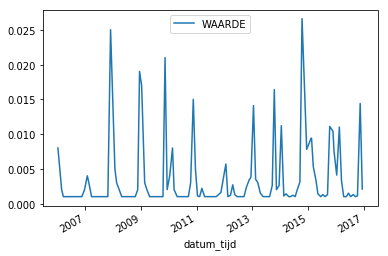

In [40]:
df_wal_nit.plot(x = "datum_tijd", y = "WAARDE")

To do: zelfde plotje voor verschillende parameters in 1 grafiek